# Выявление случаев мошенничества с кредитными картами


## Содержание 

В этом проекте используется Credit Card Fraud Detection Dataset 2013. Набор данных, содержащий информацию о транзакциях по кредитным картам, совершённых европейскими держателями карт в сентябре 2013 года.

Представлены транзакции, которые произошли за два дня. 
492 мошенничества из 284 807 транзакций. 

Набор данных сильно несбалансирован.

## Исходные данные

Набор данных содержит только числовые переменные.

Из-за проблем с конфиденциальностью и соблюдения этических норм не были предоставлены исходные данные и дополнительную справочная информация о них.

## Цель


- Выполнить исследовательский анализ данных с помощью методов обработки данных в Python/Jupyter Notebook
- Создать машинного обучения для выявления мошенничества с кредитными картами
- Благодаря сравнительному анализу различных метрик, выявить лучшую модель

## Стадии решения задачи
- подключение модулей (import modules)
- загрузка данных (data lodaing)
- разведочный анализ данных (exploratory data analysis, EDA)
- предварительная обработка данных (preprocessing)
- обучение 3 моделей (models fitting)
- использование метрик классификаций
- прогнозирование (prediction)

# 1. Подключение библиотек

Для решения задачи анализа данных воспользуемся библиотеками numpy, pandas и scikit-learn.
- Библиотека pandas предоставляет широкий спектр функций по обработке табличных данных.
- Кроме того, нам понадобятся библиотеки matplotlib, seaborn для научной визуализации
- Библиотека numpy содержит реализации многомерных массивов и алгоритмов линейной алгебры. 
- Библиотека scikit-learn реализует множество алгоритмов машинного обучения. 

In [1]:
import pandas as pd #для создания датафрейма
import matplotlib.pyplot as plt #графики
import seaborn as sns #графики
import numpy as np #работа с массивами

# для обучения
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve

import warnings 

# Ignore all FutureWarnings
warnings.filterwarnings("ignore")

# 2. Загружаем данные

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Описание данных

Признаки:
- Time - Кол-во секунд, прошедших между каждой транзакцией и первой транзакцией в наборе данных
- Amount - это сумма транзакции, эта функция может использоваться, например, для обучения с учётом затрат
- V1...V28 - Скрытые данные пользователей 

Целевой признак:
- Class - переменная ответа, которая принимает значение 1 в случае мошенничества и 0 в остальных случаях

# 2.1. Первичный анализ

In [4]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
66197,51933.0,-1.874786,-3.105252,2.033033,-1.997230,0.648031,-1.192880,-1.611201,0.245112,-1.865026,...,0.277774,0.434256,0.493363,-0.058583,-0.245379,-0.302985,-0.133223,-0.060476,113.00,0
142817,84956.0,1.109306,0.036589,0.726715,0.927785,-0.578607,-0.525990,-0.001354,-0.086065,0.295823,...,-0.146445,-0.215617,0.078569,0.662180,0.329868,0.260934,-0.003820,0.020446,28.84,0
34651,37766.0,0.952919,0.544368,0.190448,2.735223,0.830167,1.663600,-0.255378,0.538381,-0.384192,...,-0.033905,0.288240,0.012668,-1.047677,0.334794,0.203818,0.102563,0.041459,7.57,0
256501,157729.0,-1.182202,-0.025782,3.183450,0.534385,-1.405067,1.407112,-0.936555,0.490006,0.903806,...,-0.401192,0.195966,-0.298087,1.046367,0.477509,-0.217217,0.502342,0.114366,33.00,0
261994,160264.0,2.086706,-0.995649,-1.956735,-1.194951,-0.024762,-0.519696,-0.187047,-0.206100,-0.771827,...,0.080278,-0.077649,0.006922,-1.176005,-0.024841,-0.268109,-0.071838,-0.070299,101.00,0


In [5]:
# Размерность дата-сета
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Проверяем дата-сет на пустые значения
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Пустых значений не обнаружено

In [8]:
# Проверяем дата-сет на дублирование
df.duplicated().sum()

1081

In [9]:
# Удаляем дубликаты
df = df.drop_duplicates()

In [10]:
# Проверка
df.duplicated().sum()

0

<Axes: >

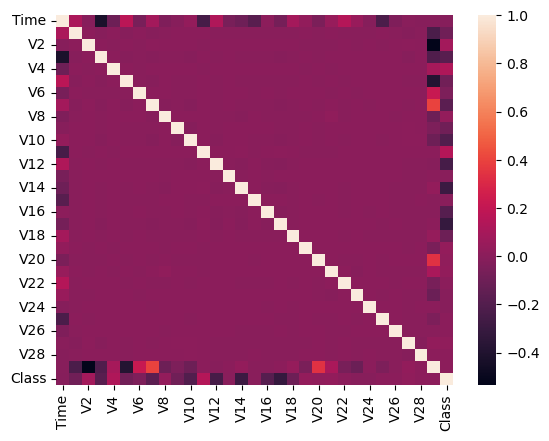

In [11]:
# Корреляционная карта дата-сета
sns.heatmap(df.corr())

### Заметим, что зависимостей совсем не обнаружено

In [12]:
columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7' ,'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

In [14]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0000,94811.0776,47481.0479,0.0000,54204.7500,84692.5000,139298.0000,172792.0000
V1,283726.0000,0.0059,1.9480,-56.4075,-0.9160,0.0204,1.3161,2.4549
V2,283726.0000,-0.0041,1.6467,-72.7157,-0.6003,0.0639,0.8003,22.0577
V3,283726.0000,0.0016,1.5087,-48.3256,-0.8897,0.1800,1.0270,9.3826
V4,283726.0000,-0.0030,1.4142,-5.6832,-0.8501,-0.0222,0.7396,16.8753
V5,283726.0000,0.0018,1.3770,-113.7433,-0.6898,-0.0535,0.6122,34.8017
V6,283726.0000,-0.0011,1.3319,-26.1605,-0.7690,-0.2752,0.3968,73.3016
V7,283726.0000,0.0018,1.2277,-43.5572,-0.5525,0.0409,0.5705,120.5895
V8,283726.0000,-0.0009,1.1791,-73.2167,-0.2088,0.0219,0.3257,20.0072
V9,283726.0000,-0.0016,1.0955,-13.4341,-0.6442,-0.0526,0.5960,15.5950


### Выбросов не наблюдается

## Заметим, что в столбце Class много одинаковых значений, проверим

In [15]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

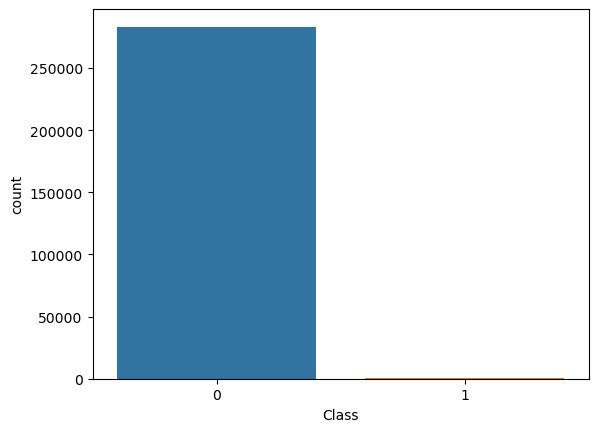

In [16]:
# Визуализируем
sns.countplot(data = df, x = 'Class')

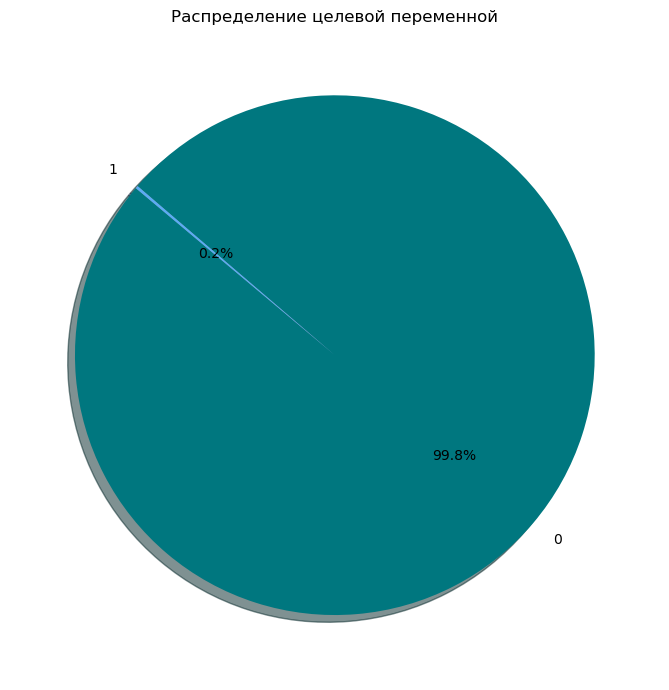

In [17]:
palette = ['#00777F', '#5BABF5', '#AADEFE', '#EAAC9F', '#8AA0AF']
status_counts = df.Class.value_counts()

plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=palette, shadow=True)

plt.title('Распределение целевой переменной')

plt.tight_layout()
plt.show()

Заметим, что df['Class'] очень несбалансированный

# 3. Обучение моделей

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis = 1), 
                                                      df['Class'], 
                                                      test_size=0.3, 
                                                      random_state=19, stratify = df['Class'])

In [19]:
dct_main = {}

## KNN

Мы выбрали модель обучения KNN, потому что он является популярным инструментом для бинарной классификации, особенно в случае, когда есть ограниченное количество данных или когда модель должна быть простой и быстрой.

In [20]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [21]:
display(y_pred[:20])
display(np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [22]:
accuracy_score(y_test, y_pred)


0.998366972908198

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.80      0.03      0.05       142

    accuracy                           1.00     85118
   macro avg       0.90      0.51      0.53     85118
weighted avg       1.00      1.00      1.00     85118



In [24]:
res1 = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
dct_main['Kneighbors'] = res1
print(res1)

0.5268022747434786


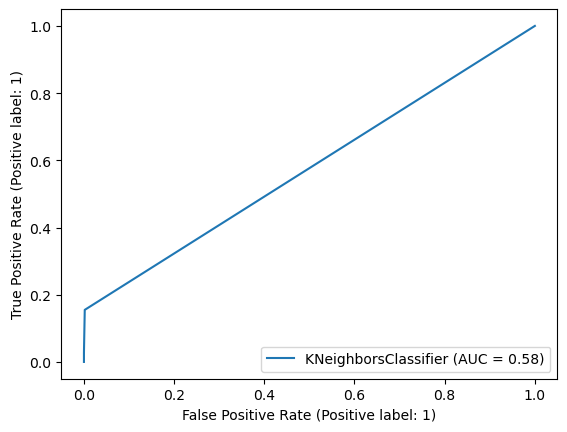

In [25]:
from sklearn.metrics import RocCurveDisplay
knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

Видим, что KNN справилась не очень хорошо, переходим к другой модели.

# GNB

Мы выбрали Гауссовский Наивный Байес (GNB) из-за его простоты и эффективности в обработке несбалансированных выборок. Основные преимущества GNB:

 - Простота и скорость: Один из самых простых и быстрых алгоритмов машинного обучения.
 -  Устойчивость к вариациям: Хорошо справляется с высокой дисперсией данных.
 -  Нечувствительность к размеру выборки: Эффективен на маленьких и больших выборках.

In [26]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

gnb_pred_test = gnb.predict(X_test)

In [27]:
display(gnb_pred_test[:20])
display(np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [28]:
accuracy_score(y_test, gnb_pred_test)


0.9928217298338777

In [29]:
print(classification_report(y_test, gnb_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84976
           1       0.14      0.63      0.23       142

    accuracy                           0.99     85118
   macro avg       0.57      0.81      0.61     85118
weighted avg       1.00      0.99      1.00     85118



In [30]:
res2 = classification_report(y_test, gnb_pred_test, output_dict=True)['macro avg']['f1-score']
dct_main['GNB'] = res2
print(res2)

0.6119770803760728


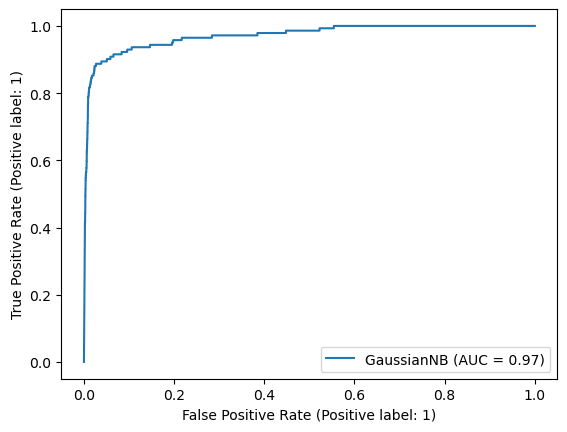

In [31]:
from sklearn.metrics import RocCurveDisplay
gnb_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

# Logistic Regress

Мы выбрали логистическую регрессию (LR) как метод для классификации и прогнозирования, так как он эффективен при несбалансированных выборках благодаря следующим преимуществам:

 - Быстрое построение модели с качественными результатами.
 - Нечувствительность к масштабу признаков, что снижает влияние несбалансированности на модель.

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr = LogisticRegression(random_state = 42)

lr.fit(X_train, y_train)

lr_pred_test = lr.predict(X_test)

In [33]:
display(lr_pred_test[:20])
display(np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [34]:
accuracy_score(y_test, lr_pred_test)


0.999177612255927

In [35]:
print(classification_report(y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.88      0.58      0.70       142

    accuracy                           1.00     85118
   macro avg       0.94      0.79      0.85     85118
weighted avg       1.00      1.00      1.00     85118



In [36]:
res3 = classification_report(y_test, lr_pred_test, output_dict=True)['macro avg']['f1-score']
dct_main['LR'] = res3
print(res3)

0.8514890329012961


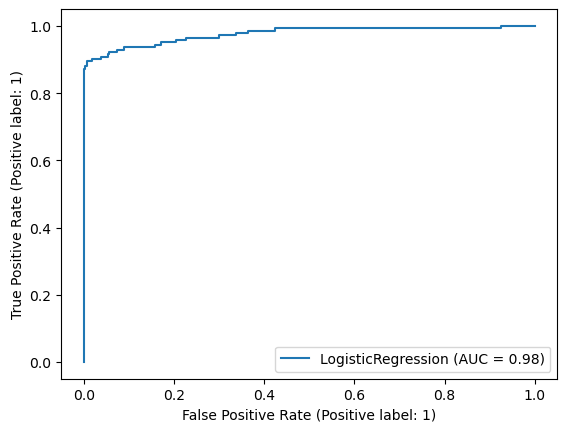

In [37]:
lr_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test) 

По итогам изучения метрик результатов обучения всех трёх моделей, можно констатировать, что лучше всех обучилась модель Logistic Regress.

Далее будем работать с моделью Logistic Regress

# 4. Визуальное сравнение результатов обучения моделей

[Text(0.5, 0, 'Models'),
 Text(0, 0.5, 'f1_score'),
 Text(0.5, 1.0, 'f1-score of ML Models')]

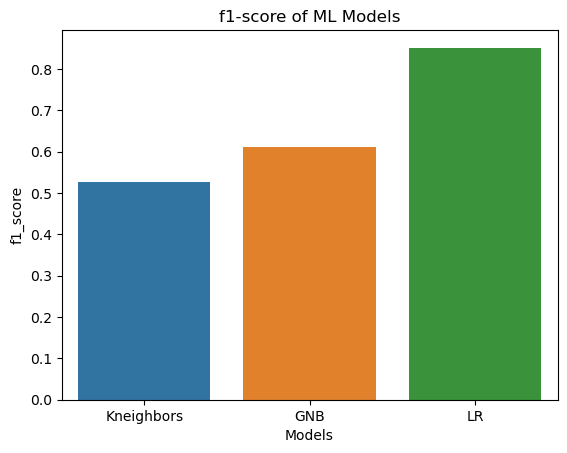

In [38]:
df3 = pd.DataFrame(dct_main.items())
ax = sns.barplot(x=0, y=1, data=df3)
ax.set(xlabel = 'Models', ylabel='f1_score', title='f1-score of ML Models')

Исходя из графика, можно сделать вывод, что показатель f1-score лучше всего у модели LogisticRegress 

In [39]:
log_cols = ["Classifier", "f1_score"]
log = pd.DataFrame(columns=log_cols)
log['Classifier'] = dct_main.keys()
log['f1_score'] = dct_main.values()
log

,Classifier,f1_score
0,Kneighbors,0.5268
1,GNB,0.6120
2,LR,0.8515


# Настройка гиперпараметров

Настроим гиперпараметры для модели LogisticRegression с параметрами random_state и C
 - random_state - это параметр, который устанавливает начальное значение генератора случайных чисел.
 - C - это параметр регуляризации, который отвечает за степень регуляризации модели.

In [40]:
%%time
# Hyperparameter tuning
param_grid = {
    'random_state': [0, 10, 20, 30, 42, 50, 60, 100],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

logistic = LogisticRegression()

grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Лучший параметр random_state: ", grid_search.best_params_['random_state'])
print("Лучший параметр C: ", grid_search.best_params_['C'])


Лучший параметр random_state:  0
Лучший параметр C:  1
CPU times: total: 3min 45s
Wall time: 3min 45s


## Обучим новую модель, используя лучшие гиперпараметры для LogisticRegress

In [41]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr = LogisticRegression(random_state = 0, C = 1)

lr.fit(X_train, y_train)

lr_pred_test = lr.predict(X_test)

In [42]:
accuracy_score(y_test, lr_pred_test)
res4 = accuracy_score(y_test, lr_pred_test)
print(res4)

0.999177612255927


In [43]:
print(classification_report(y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.88      0.58      0.70       142

    accuracy                           1.00     85118
   macro avg       0.94      0.79      0.85     85118
weighted avg       1.00      1.00      1.00     85118



### Сравнивая старую и новую метрику, можно констатировать, что она совершенно не изменилась

# Вывод

В ходе внимательного анализа датасета были обнаружены и удалены дублирующиеся строки. Пустых значений и выбросов в данных не было найдено. Мы обучили три модели: KNN, логистическая регрессия (LR) и Гауссовский Наивный Байес (GNB).

Лучшие результаты показала модель логистической регрессии, которая продемонстрировала высокую точность и стабильность при тестировании. Настройка гиперпараметров не привела к заметным улучшениям метрик, что может указывать на то, что выбранная модель уже отображает оптимальные настройки для данного датасета.

Также стоит отметить, что, несмотря на простоту, модель GNB показала конкурентоспособные результаты.